In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [16]:
df = pd.read_csv("数据集.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df["High Achiever"] = ((df["math score"] + df["reading score"] + df["writing score"])/3 >=75).astype(int)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,High Achiever
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [24]:
feature_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

X = df[feature_cols]
y = df["High Achiever"]

In [25]:
# 切分训练集：测试集 = 8：2
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 42, # 随机种子，用于保证每次切分的训练集和测试集相同，可以时任意整数
    stratify = y # 保持比例
)

In [26]:
# 预处理：one-hot编码
preprocess = ColumnTransformer(
    transformers = [
        ("cat",OneHotEncoder(handle_unknown = "ignore"), feature_cols)
    ],
    remainder = "drop"
)

In [27]:
# 决策树
tree_clf = DecisionTreeClassifier(
    random_state = 42,
    max_depth = 5,
    min_samples_leaf = 5
)

model = Pipeline(
    steps = [
        ("preprocess",preprocess),
        ("clf",tree_clf)
    ]
)

In [28]:
# 训练
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
model.score(X_test, y_test)

0.705

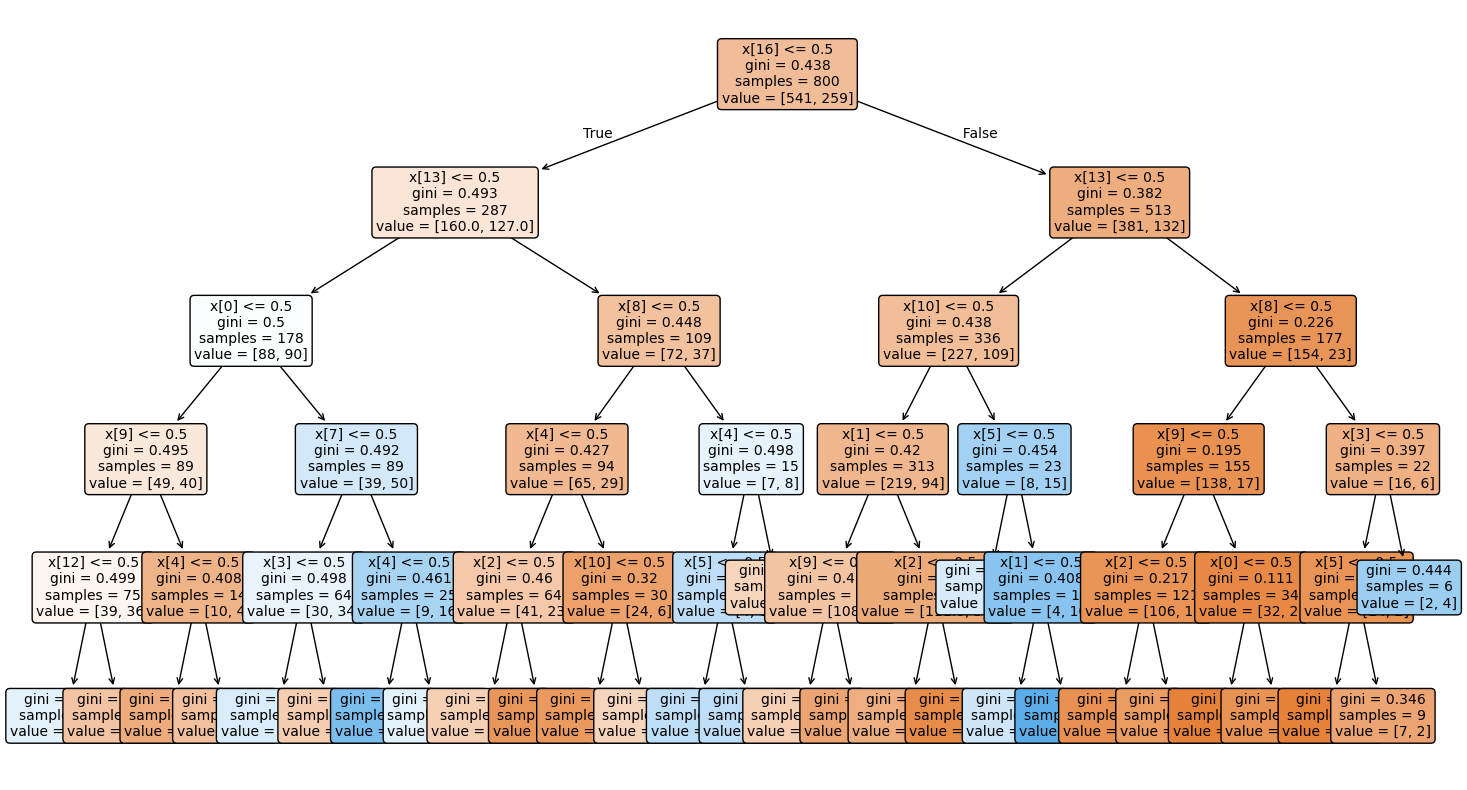

In [30]:
plt.figure(figsize = (18,10))
plot_tree(
    model.named_steps["clf"],
    filled = True,
    rounded = True,
    max_depth = 5,
    fontsize = 10
)
plt.show()

In [50]:
# 评估：Accuracy/Precision/Recall
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division = 0)
rec = recall_score(y_test, y_pred, zero_division = 0)

print(f"Accuracy : {acc: .4f}")
print(f"Precision : {prec: .4f}")
print(f"Recall : {rec: .4f}")

Accuracy :  0.7050
Precision :  0.5789
Recall :  0.3385


In [51]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7346    0.8815    0.8013       135
           1     0.5789    0.3385    0.4272        65

    accuracy                         0.7050       200
   macro avg     0.6568    0.6100    0.6143       200
weighted avg     0.6840    0.7050    0.6797       200

